In [213]:

import numpy as np
import pandas as pd
data = pd.read_csv('advertising.csv')
data.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [214]:
print(data.shape)
TV=data['TV']
radio=data['radio']
newspaper=data['newspaper']
sales=data['sales']
X=np.array([TV,radio,newspaper])
y=np.array([sales]).T.ravel()


(200, 5)


In [215]:
import ols
from scipy import c_, ones, dot, stats, diff
import matplotlib.pyplot as plt

## Linear Regression on individual channels

### TV vs Sales


Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  19:51:58
# obs:                 200
# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const           7.032594      0.457843      15.360275      0.000000
TV              0.047537      0.002691      17.667626      0.000000
Models stats                         Residual stats
R-squared             0.611875         Durbin-Watson stat   1.934689
Adjusted R-squared    0.609915         Omnibus stat         0.530558
F-statistic           312.144994         Prob(Omnibus stat)   0.766992
Prob (F-statistic)    0.000000			JB stat              0.668808
Log likelihood       -519.045664			Prob(JB)             0.715765
AIC criterion         5.210457         Skew                -0.088632
BIC criterion         5.243440         Kurtosis             2.779015
RSE is 3.258656368650462


<IPython.core.display.Javascript object>


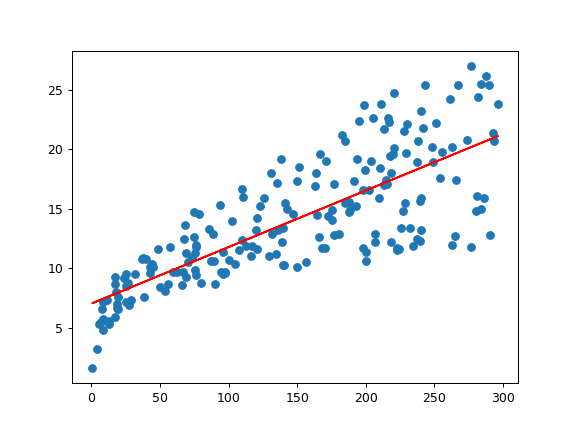

In [216]:

model=ols.ols(y,TV,'sales',['TV'])
model.summary()
X2=ones(200)
pred=dot(model.b,np.array([X2,TV]))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))
plt.scatter(TV,y)
plt.plot(TV,pred,color='red')
plt.show()


### Radio vs Sales


Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  19:52:06
# obs:                 200
# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const           9.311638      0.562900      16.542245      0.000000
radio           0.202496      0.020411      9.920765      0.000000
Models stats                         Residual stats
R-squared             0.332032         Durbin-Watson stat   1.945713
Adjusted R-squared    0.328659         Omnibus stat         19.357987
F-statistic           98.421588         Prob(Omnibus stat)   0.000063
Prob (F-statistic)    0.000000			JB stat              21.909695
Log likelihood       -573.336890			Prob(JB)             0.000017
AIC criterion         5.753369         Skew                -0.763695
BIC criterion         5.786352         Kurtosis             3.544281
RSE is 4.274944354901061


<IPython.core.display.Javascript object>


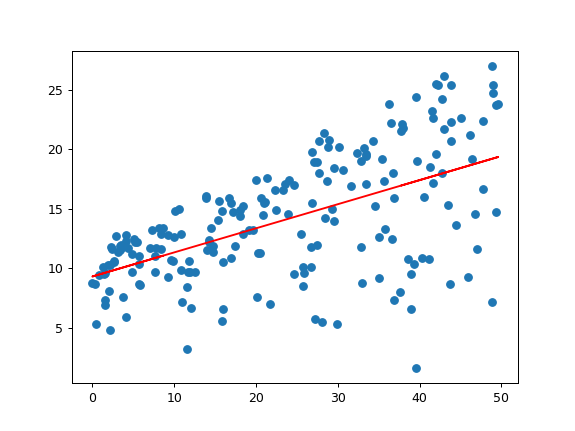

In [217]:
model=ols.ols(y,radio,'sales',['radio'])
model.summary()
pred=dot(model.b,np.array([X2,radio]))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))
plt.scatter(radio,y)
plt.plot(radio,pred,color='red')
plt.show()

### Newspapers vs Sales


Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  19:52:13
# obs:                 200
# variables:         2
variable     coefficient     std. Error      t-statistic     prob.
const           12.351407      0.621420      19.876096      0.000000
newspapers           0.054693      0.016576      3.299591      0.001148
Models stats                         Residual stats
R-squared             0.052120         Durbin-Watson stat   1.983434
Adjusted R-squared    0.047333         Omnibus stat         6.230710
F-statistic           10.887299         Prob(Omnibus stat)   0.044363
Prob (F-statistic)    0.001148			JB stat              5.483010
Log likelihood       -608.335676			Prob(JB)             0.064473
AIC criterion         6.103357         Skew                 0.329555
BIC criterion         6.136340         Kurtosis             2.527205
RSE is 5.092480366520192


<IPython.core.display.Javascript object>


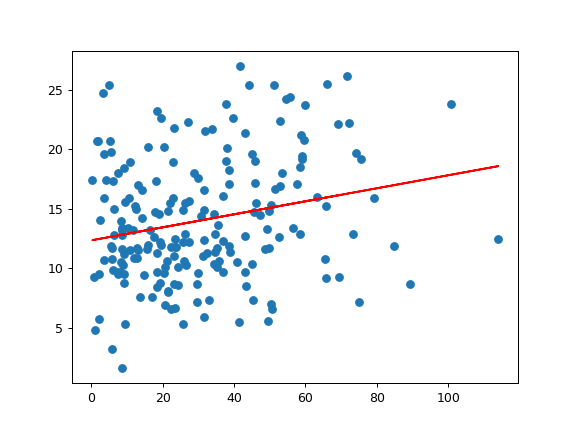

In [218]:
model=ols.ols(y,newspaper,'sales',['newspapers'])
model.summary()
pred=dot(model.b,np.array([X2,newspaper]))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))
plt.scatter(newspaper,y)
plt.plot(newspaper,pred,color='red')
plt.show()

Every model seems to have good p-value except for the newspapers. Thus we expect that sales dont depend much on newspapers. Let us explore more about this by multiple regression

## Multi Linear Regresssion

In [219]:


model=ols.ols(y,X.T,'sales',['TV','radio','newspaper'])
model.summary()
X2=np.array([ones(200)])
new=np.concatenate((X2, X), axis=0)
pred=dot(model.b,np.array(new))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))



Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  19:52:18
# obs:                 200
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const           2.938889      0.311908      9.422288      0.000000
TV              0.045765      0.001395      32.808624      0.000000
radio           0.188530      0.008611      21.893496      0.000000
newspaper          -0.001037      0.005871     -0.176715      0.859915
Models stats                         Residual stats
R-squared             0.897211         Durbin-Watson stat   2.083648
Adjusted R-squared    0.895637         Omnibus stat         60.413959
F-statistic           570.270704         Prob(Omnibus stat)   0.000000
Prob (F-statistic)    0.000000			JB stat              151.241420
Log likelihood       -386.181118			Prob(JB)             0.000000
AIC criterion         3.901811         Skew                -1.327354
BIC criterion         3.967778         Kurtosis            

The high p-value of newspaper suggests that the sales dont depend on newspapers. Also the high value of F statistic suggests that null hypothesis (that sales dont depend on any channels at all) must be rejected.

## TV and radio vs Sales


Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  19:52:23
# obs:                 200
# variables:         3
variable     coefficient     std. Error      t-statistic     prob.
const           2.921100      0.294490      9.919193      0.000000
TV              0.045755      0.001390      32.908708      0.000000
radio           0.187994      0.008040      23.382446      0.000000
Models stats                         Residual stats
R-squared             0.897194         Durbin-Watson stat   2.080781
Adjusted R-squared    0.896151         Omnibus stat         60.021551
F-statistic           859.617718         Prob(Omnibus stat)   0.000000
Prob (F-statistic)    0.000000			JB stat              148.678512
Log likelihood       -386.197049			Prob(JB)             0.000000
AIC criterion         3.891970         Skew                -1.323443
BIC criterion         3.941445         Kurtosis             6.291719
RSE is 1.6771096771017613


<IPython.core.display.Javascript object>


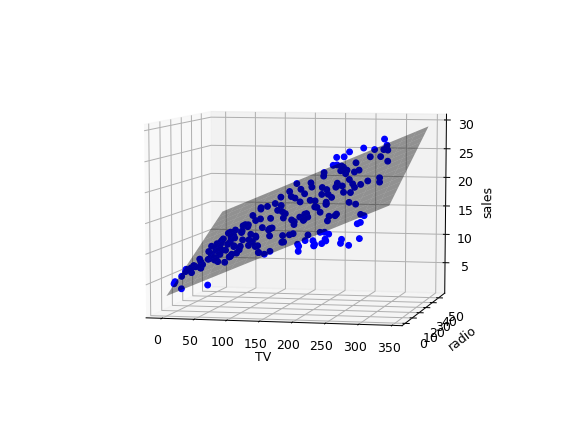

In [220]:
model=ols.ols(y,X[:2].T,'sales',['TV','radio'])
model.summary()
X2=np.array([ones(200)])
new=np.concatenate((X2, X[:2]), axis=0)
pred=dot(model.b,np.array(new))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(TV,radio,y,
           c='blue',
           marker='o',
           alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
xx = np.arange(0, 350, 20)                # generate a mesh
yy = np.arange(0, 60, 4)
xx, yy = np.meshgrid(xx, yy)
X2=np.array([ones(len(xx.ravel()))])
new=np.concatenate((X2,[xx.ravel()],[yy.ravel()]), axis=0)
zz=dot(model.b,np.array(new)).reshape(xx.shape)

ax.plot_surface(xx,yy,zz,
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)


## Residual Plot
Let us try to find if there is a nonlinear relationship between sales and TV&radio by residual plot

<IPython.core.display.Javascript object>


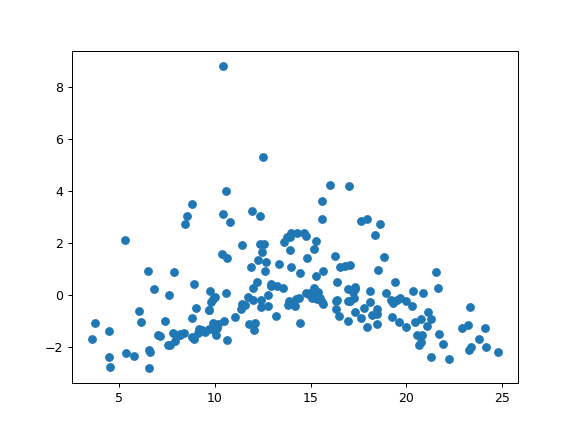

In [223]:
X2=np.array([ones(200)])
new=np.concatenate((X2, X[:2]), axis=0)
pred=dot(model.b,np.array(new))
pred=dot(model.b,np.array(new))
residuals=pred-y
plt.scatter(pred,residuals)
plt.show()

Since There is a pattern in the plot, we are led to believe that the relationship is non linear. We shall try to rectify this by adding nonlinear features as we do below

## Adding the interaction term
Let us add the interaction term TV * Radio

In [240]:
interaction_term=(TV*radio).values.reshape(X[:1].shape)
new_X=np.concatenate((X[:2],interaction_term), axis=0)
model=ols.ols(y,new_X.T,'sales',['TV','radio','TV*radio'])
model.summary()
X2=np.array([ones(200)])
new=np.concatenate((X2, new_X), axis=0)
pred=dot(model.b,np.array(new))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))



Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  21:33:58
# obs:                 200
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const           6.750220      0.247871      27.232755      0.000000
TV              0.019101      0.001504      12.698953      0.000000
radio           0.028860      0.008905      3.240815      0.001400
TV*radio           0.001086      0.000052      20.726564      0.000000
Models stats                         Residual stats
R-squared             0.967791         Durbin-Watson stat   2.223629
Adjusted R-squared    0.967298         Omnibus stat         128.132352
F-statistic           1963.056876         Prob(Omnibus stat)   0.000000
Prob (F-statistic)    0.000000			JB stat              1183.718579
Log likelihood       -270.138921			Prob(JB)             0.000000
AIC criterion         2.741389         Skew                -2.323116
BIC criterion         2.807356         Kurtosis         

Both RSE and R^2 values have improved significantly. Also the p-value of TV * radio term is also very less. Hence this model is far better than previous one

## Polynomial Regression
Let us add TV^2 and radio^2 terms

In [243]:
TV_sq=(TV**2).values.reshape(X[:1].shape)
radio_sq=(radio**2).values.reshape(X[:1].shape)
new_X=np.concatenate((X[:2],TV_sq,radio_sq), axis=0)
model=ols.ols(y,new_X.T,'sales',['TV','radio','TV^2','Radio^2|'])
model.summary()
X2=np.array([ones(200)])
new=np.concatenate((X2, new_X), axis=0)
pred=dot(model.b,np.array(new))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))



Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  21:38:40
# obs:                 200
# variables:         5
variable     coefficient     std. Error      t-statistic     prob.
const           1.534870      0.409316      3.749841      0.000233
TV              0.078520      0.004978      15.773703      0.000000
radio           0.158838      0.028301      5.612547      0.000000
TV^2           -0.000114      0.000017     -6.798506      0.000000
Radio^2|           0.000714      0.000571      1.249824      0.212862
Models stats                         Residual stats
R-squared             0.917361         Durbin-Watson stat   2.137674
Adjusted R-squared    0.915666         Omnibus stat         25.406743
F-statistic           541.167508         Prob(Omnibus stat)   0.000003
Prob (F-statistic)    0.000000			JB stat              53.616316
Log likelihood       -364.360708			Prob(JB)             0.000000
AIC criterion         3.693607         Skew                -0.59

The p value of Radio^2 term is significantly large. Hence we shall remove it

In [244]:
TV_sq=(TV**2).values.reshape(X[:1].shape)
new_X=np.concatenate((X[:2],radio_sq), axis=0)
model=ols.ols(y,new_X.T,'sales',['TV','radio','TV^2'])
model.summary()
X2=np.array([ones(200)])
new=np.concatenate((X2, new_X), axis=0)
pred=dot(model.b,np.array(new))
print("RSE is",(sum((pred-y)**2)/198)**(1/2))


Dependent Variable: sales
Method: Least Squares
Date:  Sat, 26 Jan 2019
Time:  21:40:11
# obs:                 200
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const           3.155797      0.369096      8.550067      0.000000
TV              0.045767      0.001390      32.925707      0.000000
radio           0.156001      0.031393      4.969366      0.000001
TV^2            0.000668      0.000633      1.054278      0.293053
Models stats                         Residual stats
R-squared             0.897774         Durbin-Watson stat   2.075282
Adjusted R-squared    0.896209         Omnibus stat         66.662537
F-statistic           573.773343         Prob(Omnibus stat)   0.000000
Prob (F-statistic)    0.000000			JB stat              173.445795
Log likelihood       -385.631558			Prob(JB)             0.000000
AIC criterion         3.896316         Skew                -1.455552
BIC criterion         3.962282         Kurtosis             6.51

But now the p-value of TV^2 term is large. Hence we remove it. So we are back to square 1. Hence polynomial regression does not seem to give any better results

## Summary:
#### The channels responsible for sales are TV and Radio. The best regression model is obtained when we add the interaction term TV * Radio in sales vs TV&Radio regression model. Polynomial regression does not seem to improve the results